# 🌉 Workbook 01 - Solving beams with `sympy`

^^^ Bridge? Beam? :)

Use the "sympy beams reference.ipynb" notebook for assistance on how to create `Beam` objects.

**Remember:**
* For now, sympy is limited to solving beams with integers (numbers without decimal points) and not with floats (numbers with decimal points)
* The reason for this because we are going to be giving enough inputs/boundary conditions into the system of equations that the system of equations becomes _over-determined_ (more equations than unknowns). Floating point numbers (decimals) cannot be precisely represented in computers in binary form. This is a limitation of floating point numbers across _all computer systems_ (it is not just a "Python thing").
* By using floating point numbers with an over-determined system of equations, it is possible to get one of the solutions to be `0.5` and the other solution to be `0.499999999999991`. We know that these are effectively the same number but to a computer, they are different.
* To prevent this, use `int` numbers only. Thus, for various unit systems, you will need to convert the values into a low enough scale (e.g. millimeters) so that you can use only integers to represent the information.
* Feel free to round up/down any calculated values (e.g. E or I values)

In [2]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols
import math

# Task 01

Create a `Beam` object to analyze a beam with the following attributes:
* 14 ft long
* E, I as symbols
* Vertical supports @:
    * 2 ft, 8 ft, 11 ft
* Loads as follows:
    * Point load: 500 lbs, @ 4 ft
    * Uniform distributed load: 200 lbs @ 1 ft, ending @ 10 ft
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection assuming a W12x50 (aka, W310x74). Note: this wide-flange section is from the CISC handbook. If you do not have the CISC handbook (or you are in a country that has a different handbook), use a somewhat similar section.

## Task 01 Response

{R1: -26900/27, R2: -13300/9, R3: 4700/27}


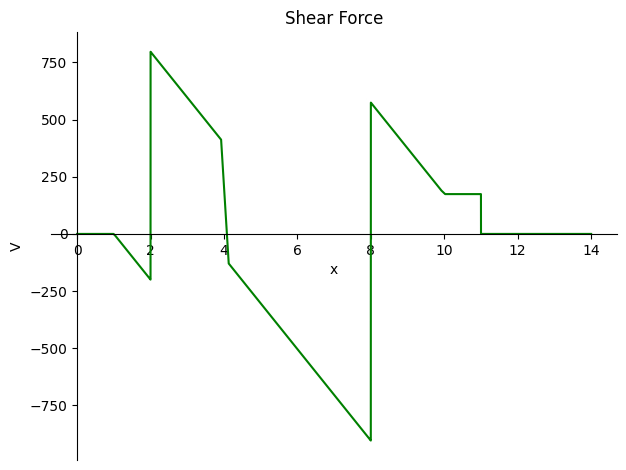

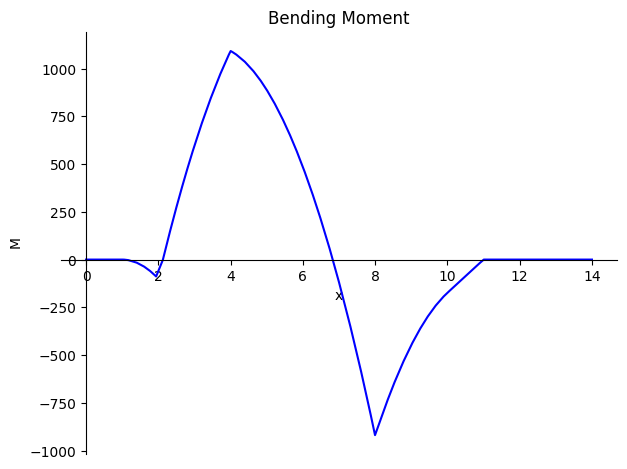

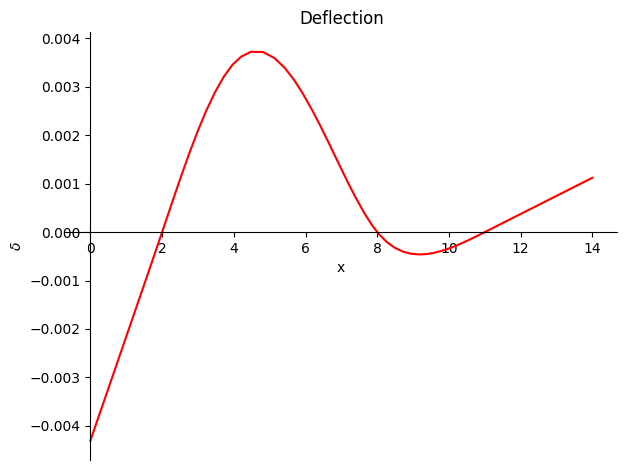

In [34]:
#units -> Length: ft, Force: lbs-f

E, I = symbols("E I")
R1, R2, R3 = symbols("R1 R2 R3")
my_beam = Beam(14, E, I) # Beam lenght of 14

#Applied Loads
my_beam.apply_load(500, 4, -1) # point load @ 4
my_beam.apply_load(200, 1, 0, 10) # UDL from 1 to 10

#Reaction Forces
my_beam.apply_load(R1, 2, -1) # R1 @ 2, point load reaction
my_beam.apply_load(R2, 8, -1) # R2 @ 8, point load reaction
my_beam.apply_load(R3, 11, -1) # R3 @ 11, point load reaction

#Boundary Conditions
my_beam.bc_deflection = [(2, 0), (8, 0), (11, 0)] #deflections @ supports = 0

#Solving for reaction forces
my_beam.solve_for_reaction_loads(R1, R2, R3) 

#solving for diagrams
print(my_beam.reaction_loads)
my_beam.plot_shear_force()
my_beam.plot_bending_moment()
my_beam.plot_deflection(subs={E: 57600000, I:0.0142}) # Sections properties assumed for W12 x 50

# Task 02

Create a `Beam` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m
    * Point load of 175 kN @ 2.2 m
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all in puts in order for the results to make sense.

## Task 02 Response

{R: -406552, M: 801793600}


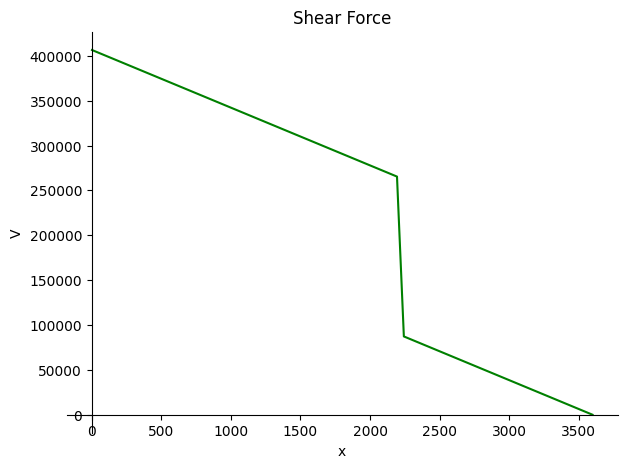

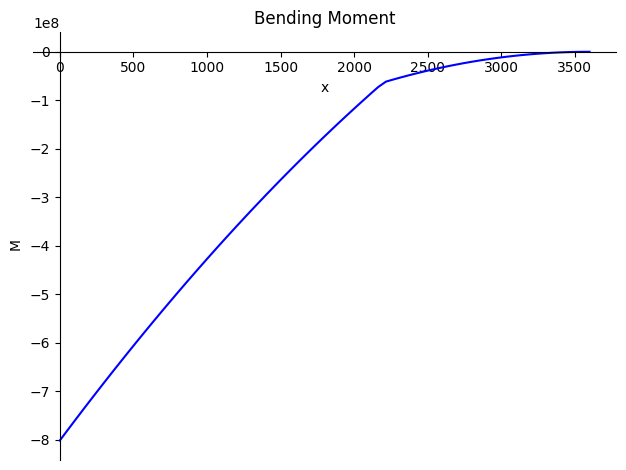

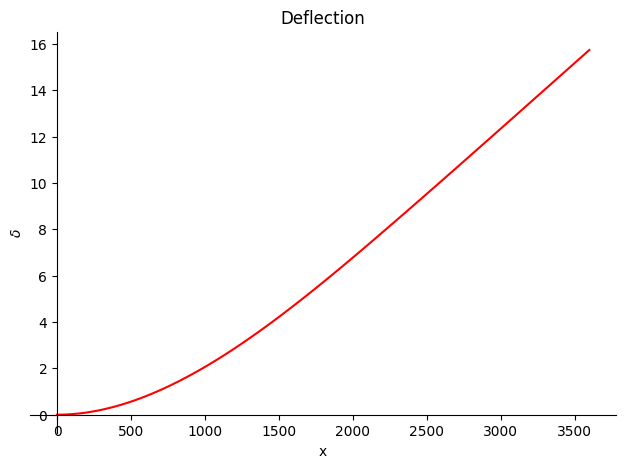

In [33]:
#units -> Length: mm, Force: newtons
E, I = symbols("E I")
R, M = symbols("R M")
my_beam = Beam(3600, E, I)

#Applied loads
my_beam.apply_load(4.32, 0, 0, 3600) #self weight UDL
my_beam.apply_load(60, 0, 0, 3600) #UDL applied along entire beam length
my_beam.apply_load(175000, 2200, -1) #point load applied @ 2.2m

#Reaction forces / moments
my_beam.apply_load(R, 0, -1) #reaction force @ fixed end
my_beam.apply_load(M, 0, -2) #moment @ fixed end

#Boundary conditions
my_beam.bc_deflection = [(0, 0)] # deflections @ fixed end = 0
my_beam.bc_slope = [(0, 0)] # rotation @ fixed end = 0

#Solving for reaction forces
my_beam.solve_for_reaction_loads(R, M)

#Solving for diagrams
print(my_beam.reaction_loads)
my_beam.plot_shear_force()
my_beam.plot_bending_moment()
my_beam.plot_deflection(subs={E: (4500 * math.sqrt(45)), I:((300*pow(600,3))/12)}) #calcualtion of section properites assuming E=4500sqrt(fc) & I=bd^3/12


# Task 03

Create a `Beam` object to analyze a core footing with the following attributes. You are going to assume a trapezoidal reaction load underneath the footing and solve for it.

* 70 ft x 40 ft (analyze just the long direction)
* 45 MPa concrete, 4 ft deep
* Trapezoidal load as _vertical reaction_ (You will have two reaction symbols: one for the UDL and one for the ramp load. The result of the ramp load reaction will be the slope of the ramp.)
* Loads as follows:
    * Footing self-weight
    * 50 kip @ 12 ft
    * 60 kip @ 30 ft
    * -8000 kip-ft @ 30 ft
    * -7500 kip-ft @ 40 ft
    * 800 kip @ 40 ft
    * 800 kip @ 60 ft    
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams

**Note** You won't be able to assign slope or deflection boundary conditions so you will only be able to solve for reactions, shear, and moment.

## Task 03 Response

{R1: -90/49, R2: -2283/1715}


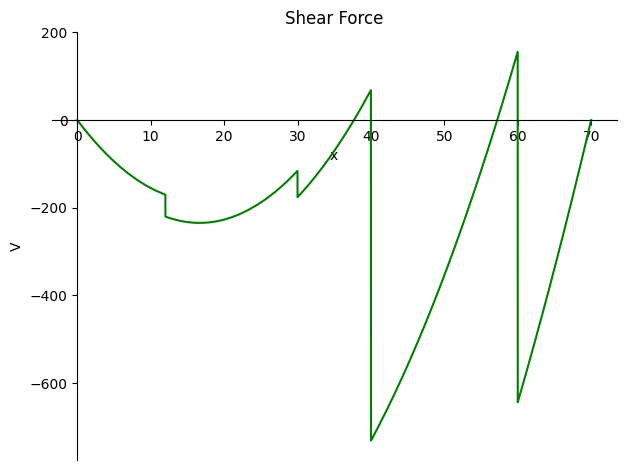

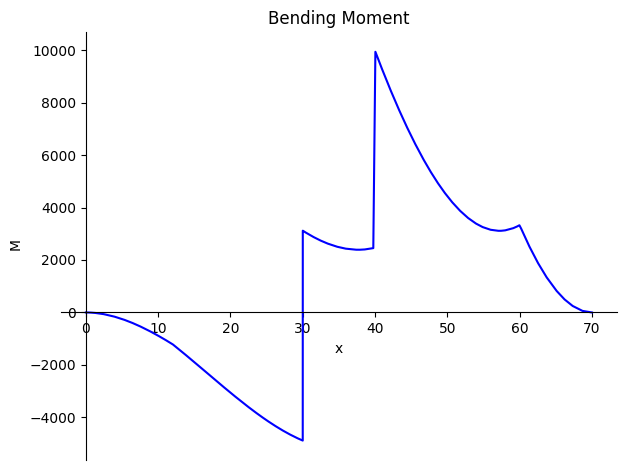

In [37]:
#units -> Length: ft, Force: kips
E, I = symbols("E I")
R1, R2 = symbols("R1 R2")
my_beam = Beam(70, E, I)

#Applied loads
my_beam.apply_load(24, 0, 0, 70) #self weight ~150lbs / ft^3
my_beam.apply_load(50, 12, -1) #point load @ 12
my_beam.apply_load(60, 30, -1) #point load @ 30
my_beam.apply_load(-7500, 40, -2) #moment @ 40
my_beam.apply_load(-8000, 30, -2) #moment @ 30
my_beam.apply_load(800, 40, -1) #point load @ 40
my_beam.apply_load(800, 60, -1) #point laod @ 60

#trapizondal reaction force
my_beam.apply_load(R1, 0, 0, 70) # UDL portion of the trapizoidal force
my_beam.apply_load(R2, 0, 1, 70) # triangular portion of the trapizoidal force using 'ramp' loads

#Solving for reaction forces
my_beam.solve_for_reaction_loads(R1, R2)

#Solving for diagrams
print(my_beam.reaction_loads)
my_beam.plot_shear_force()
my_beam.plot_bending_moment()